<a href="https://colab.research.google.com/github/Aomaphisara/ULckdresearch2023/blob/main/crustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/ckd/data.xlsx")

In [3]:
df.head(3)

,Unnamed: 0,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,...,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation,Group,Fold,TimeDiff
0,1,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:54.710,63.60,0,...,5.284,215.0,81.0,123.0,99.0,21.019,1,0,1,0.000000
1,3,2299,4546471,5.550691,0,1,0,2018-12-12 09:18:49.913,70.20,0,...,5.755,219.0,64.0,146.0,73.0,15.198,1,1,1,1.131507
2,2,2299,5812902,-6.063710,0,1,0,2019-12-19 09:51:24.427,64.02,0,...,5.300,193.0,62.0,129.0,65.0,30.879,1,0,1,1.191781


ตัวแปรทั้งหมด  85 ตัวแปร

In [ ]:
df.shape

(52620, 86)

จาก 85 ตัวแปร นำออก 15 ตัวแปร เหลือ 70 ตัวแปรที่นำไปใช้

คอลัมน์ที่นำออก
1.   'PatientUID'
2.   PatientVisitUID',
3.   'InPatient',
4. 'OutPatient',
5. 'Emergency',
6.  'time_t1'
7. 'VisitLocation',
8.  'StartDTTM',
9.  'EndDttm',
10. 'LabCwhen'
11.  'Sex',
12. 'NATNL',
13. 'LabLocation',
14. 'Group',
15. 'Fold'

Note: ยังไม่ไม่นำตัวแปรที่เกี่ยวกับ slope หรือ eGFR ออก จะนำออกตอนแบ่งกลุ่มตามตัวแปรนั้นๆ


In [4]:
data = ['Slopes', 'eGFR_t1','TimeDiff',
   'Age', 'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
   'G1M2-ARB', 'G3M1-Statin',
       'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
   'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy',
   'L1-eGFR', 'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
data = df[data]

In [5]:
data.shape

(52620, 70)

feature scaling (ให้มีค่าอยู่ระหว่าง 0-1)

In [6]:
from sklearn.preprocessing import MinMaxScaler
cols = data.columns
ms = MinMaxScaler()
data = ms.fit_transform(data)
data = pd.DataFrame(data, columns=[cols])

In [7]:
data.describe()

,Slopes,eGFR_t1,TimeDiff,Age,BMI,BSA,Diastolic-BP,Systolic-BP,G1M2-ARB,G3M1-Statin,...,L13-Hematocrit,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio
count,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.00000,52620.000000,...,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000
mean,0.413315,0.366446,0.150568,0.581105,0.353356,0.328410,0.570213,0.543272,0.02435,0.075168,...,0.568475,0.210466,0.223322,0.084826,0.229028,0.175434,0.142607,0.351101,0.182648,0.176909
std,0.052640,0.117914,0.124334,0.138650,0.095345,0.082076,0.105812,0.123241,0.07428,0.107584,...,0.074932,0.079444,0.077557,0.051841,0.127199,0.048737,0.086660,0.119838,0.072224,0.116325
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.390658,0.300212,0.000000,0.500000,0.293657,0.270000,0.504587,0.471429,0.00000,0.000000,...,0.526866,0.161955,0.176836,0.055848,0.145455,0.147129,0.089064,0.272414,0.136364,0.079804
50%,0.415804,0.376836,0.190217,0.583333,0.348412,0.325000,0.568807,0.542857,0.00000,0.000000,...,0.574000,0.199703,0.217166,0.067439,0.185909,0.172309,0.116029,0.344828,0.170455,0.153156
75%,0.438370,0.437288,0.217391,0.678571,0.403028,0.385000,0.633028,0.614286,0.00000,0.175000,...,0.620328,0.242583,0.262668,0.096315,0.272727,0.196977,0.175227,0.406897,0.226023,0.252421
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Silhouett

slope

In [ ]:
slope = ['eGFR_t1','TimeDiff',
   'Age', 'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
   'G1M2-ARB', 'G3M1-Statin',
       'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
   'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy',
   'L1-eGFR', 'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
slope = data[slope]

stage

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is: 0.060291044518476535


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is: 0.06734291122426862


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is: 0.040476396538810216


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is: 0.03843613396254843


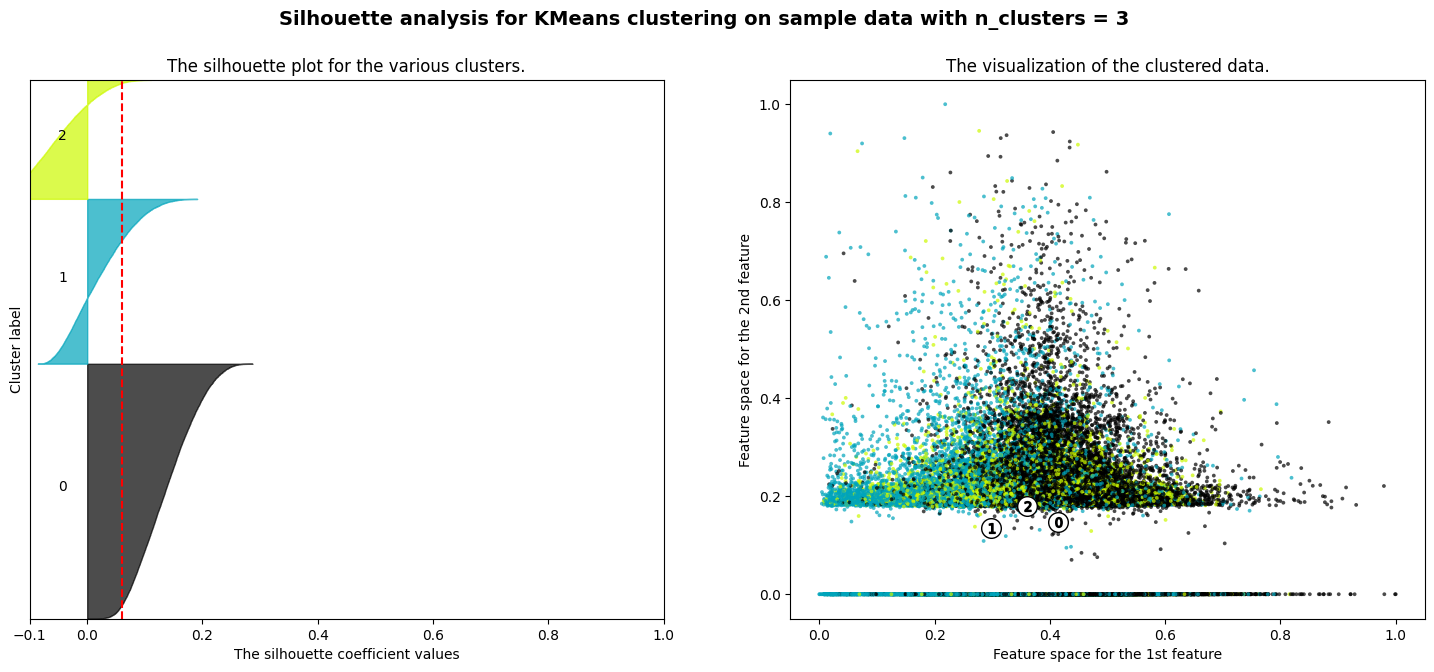

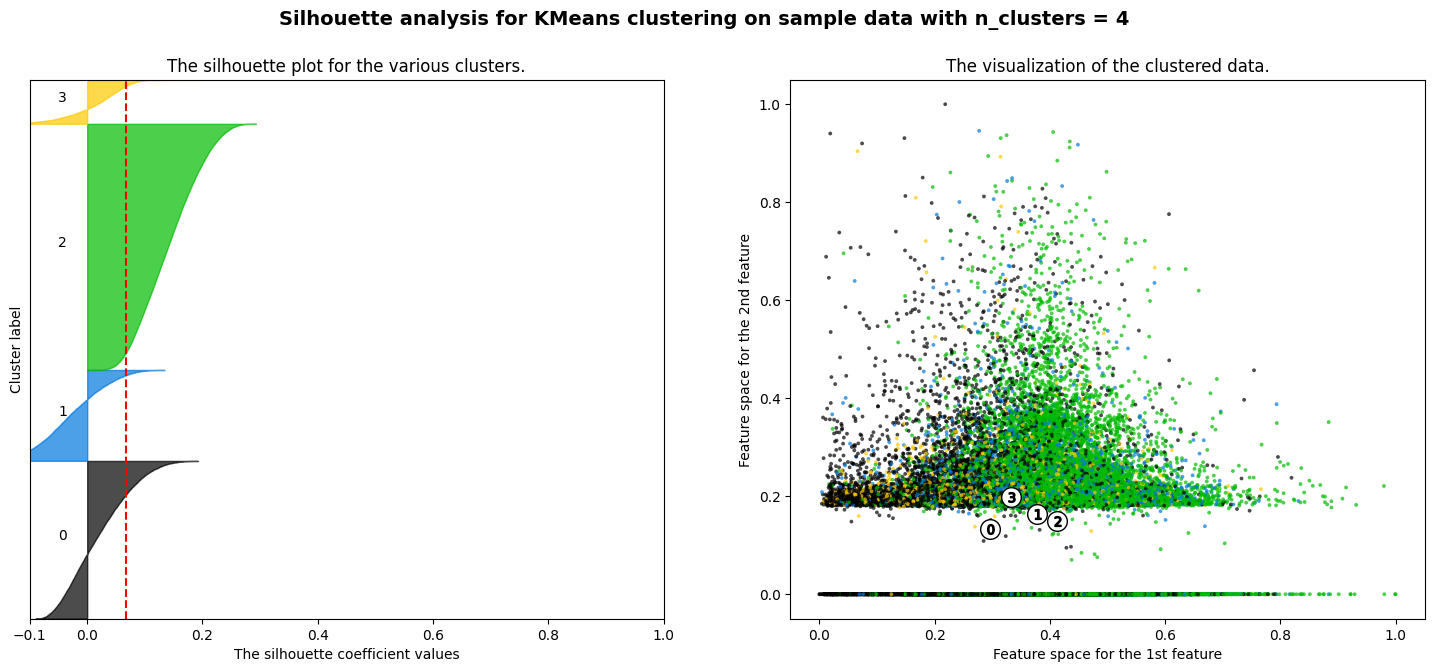

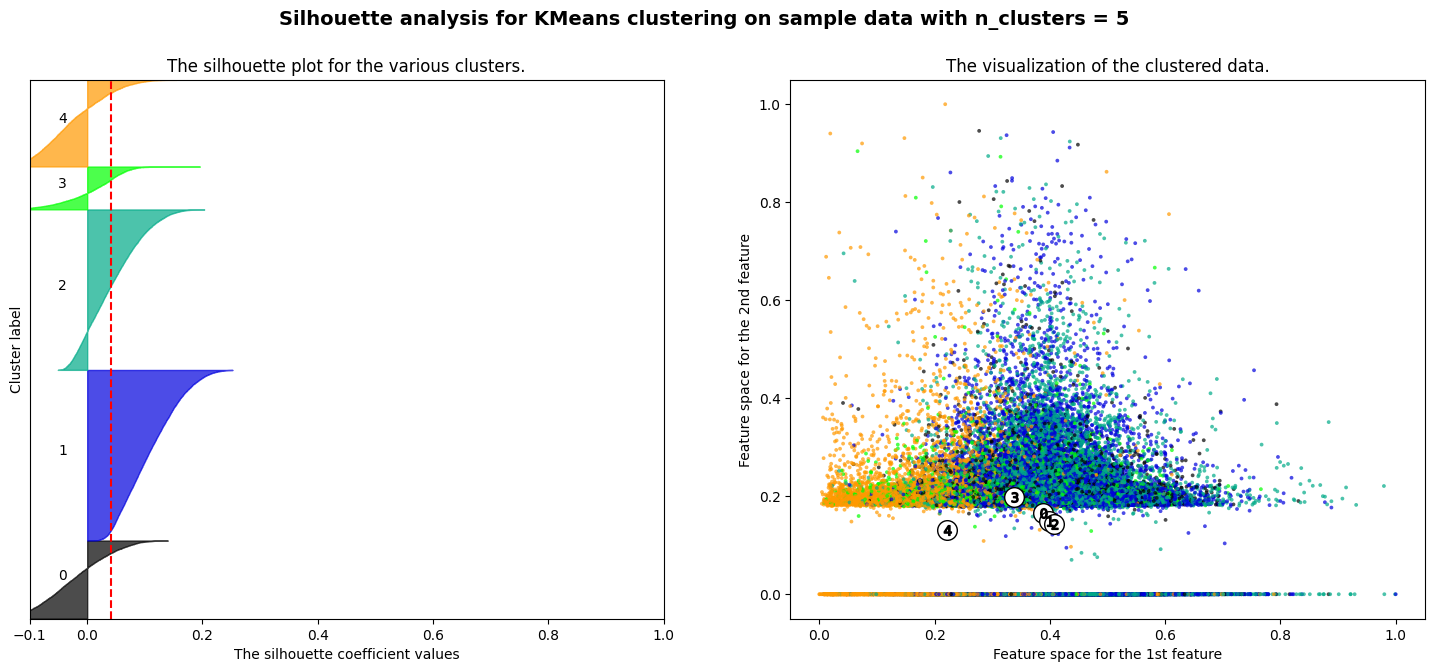

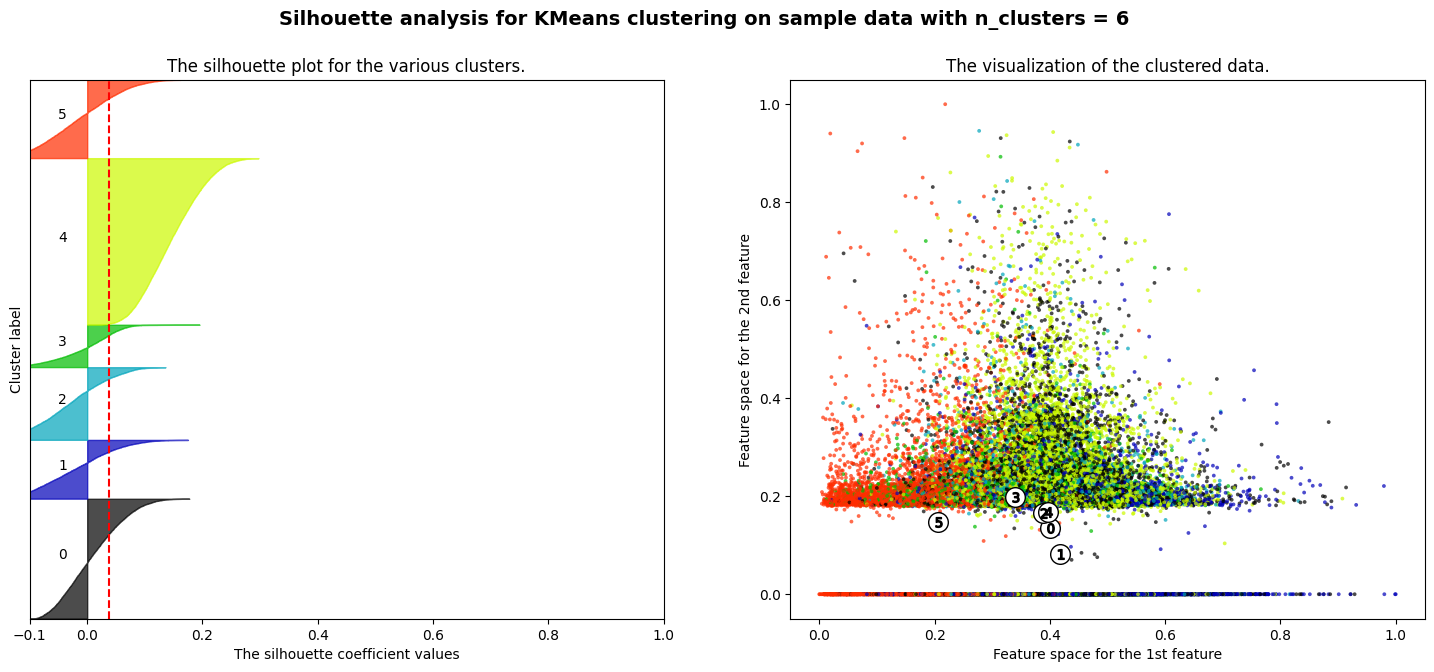

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Assuming 'data' is your dataset (replace it with your actual dataset)
X = slope.values  # Assuming 'data' is a pandas DataFrame

range_n_clusters = range(3, 7)  # Adjust the range as needed

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is:", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


slope timdiff egfr

In [ ]:
stage = ['Slopes','TimeDiff',
   'Age', 'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
   'G1M2-ARB', 'G3M1-Statin',
       'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
   'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy',
  'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
stage = data[stage]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is: 0.15486260773631802


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is: 0.04999678540599827


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is: 0.058620493825734164


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is: 0.041422130428841665


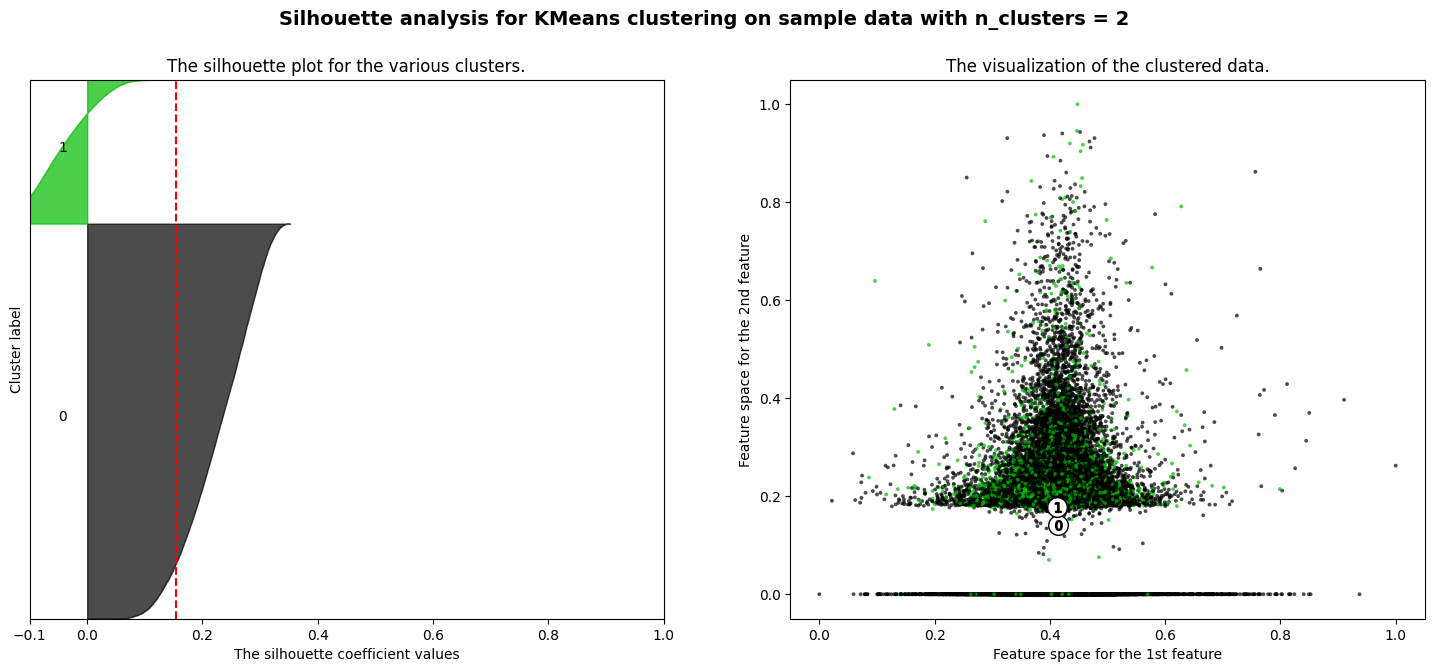

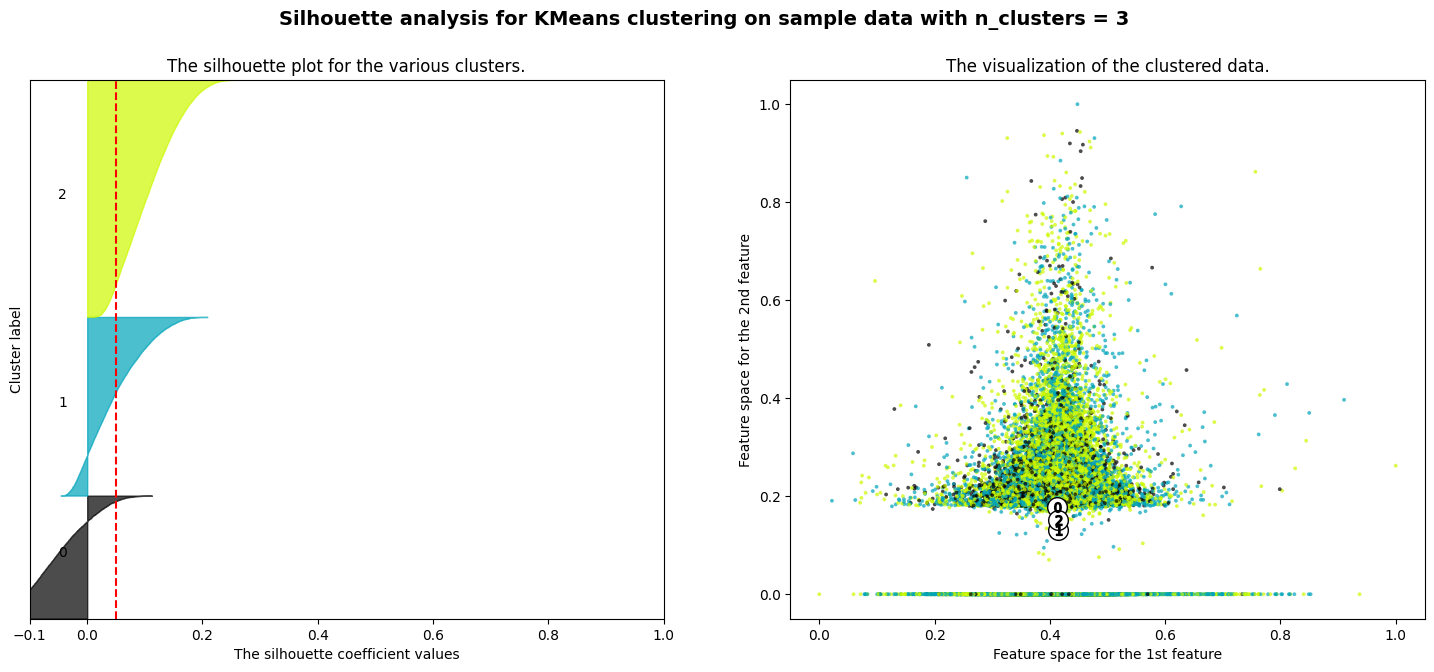

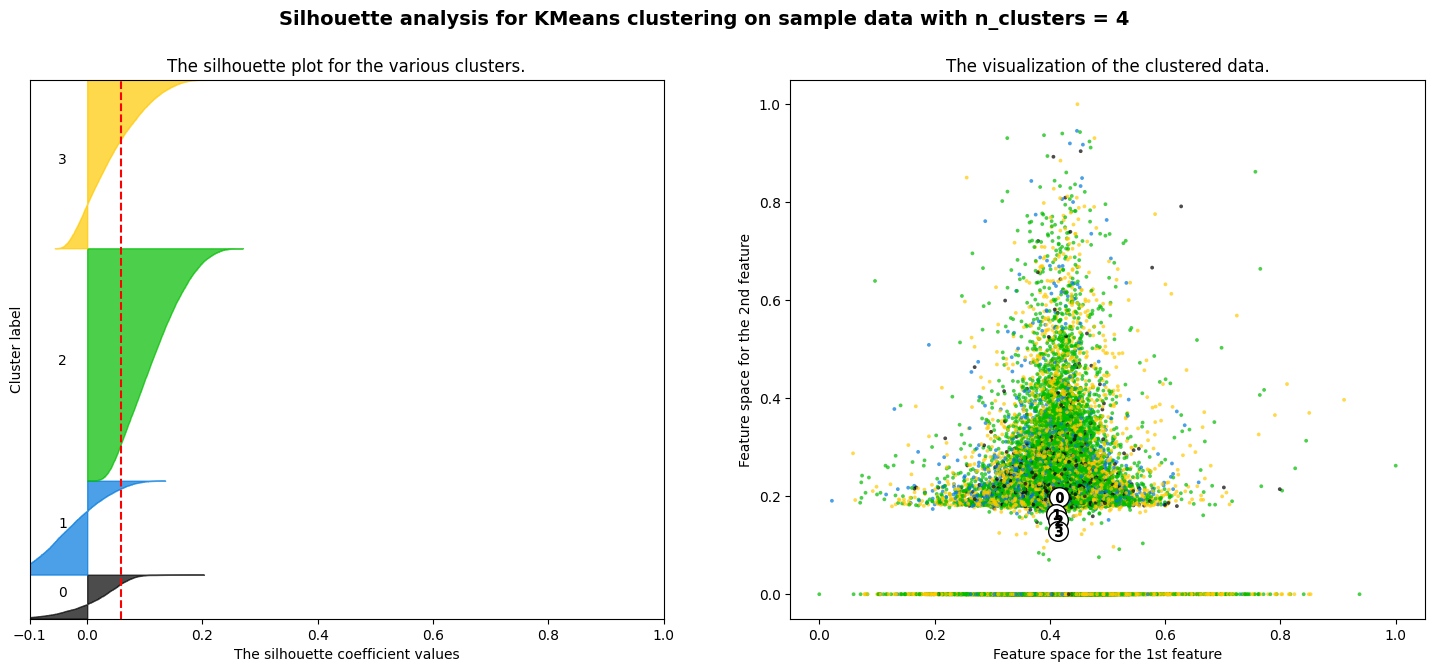

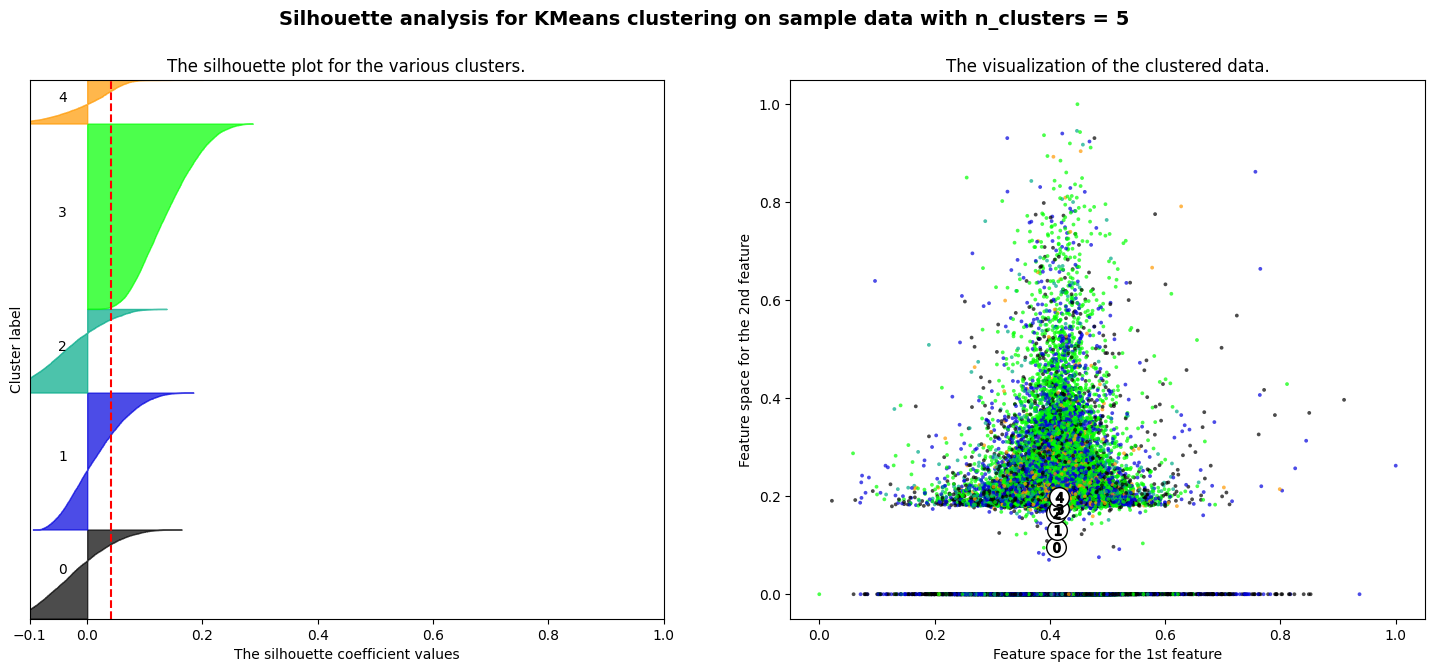

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Assuming 'data' is your dataset (replace it with your actual dataset)
X = stage.values  # Assuming 'data' is a pandas DataFrame

range_n_clusters = range(2, 6)  # Adjust the range as needed

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is:", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


##K-means

แบ่งกลุ่มข้อมูลโดย
- จัดกลุ่มเกี่ยวกับ slope มีจำนวน 4-5-6 กลุ่ม
- จัดกลุ่มเกี่ยวกับ stage มีจำนวน 3-4-5 กลุ่ม

Note : ในการจำกลุ่มจะนำตัวแปรที่เกี่ยวข้องออกจากข้อมูลในการจัดกลุ่ม

### slope

นำตัวแปร 'Slopes'

In [ ]:
slope = ['eGFR_t1','TimeDiff',
   'Age', 'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
   'G1M2-ARB', 'G3M1-Statin',
       'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
   'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy',
   'L1-eGFR', 'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
slope = data[slope]

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(slope)
slope['Cluster3']=kmeans.labels_


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(slope)
slope['Cluster4']=kmeans.labels_


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(slope)
slope['Cluster5']=kmeans.labels_


In [ ]:
slope

,eGFR_t1,TimeDiff,Age,BMI,BSA,Diastolic-BP,Systolic-BP,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,...,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,Cluster3,Cluster4,Cluster5
0,0.439972,0.000000,0.654762,0.252676,0.19500,0.587156,0.478571,0.246575,0.000,0.000,...,0.053741,0.116727,0.222488,0.072967,0.389655,0.448864,0.042122,1,2,1
1,0.486582,0.204051,0.666667,0.238841,0.19000,0.486239,0.321429,0.246575,0.225,0.000,...,0.048472,0.159545,0.227273,0.052632,0.468966,0.301136,0.030457,1,2,1
2,0.442938,0.214921,0.678571,0.250587,0.19000,0.596330,0.557143,0.273973,0.250,0.170,...,0.063224,0.118182,0.196172,0.050239,0.410345,0.255682,0.061882,2,3,3
3,0.333616,0.183300,0.690476,0.238841,0.18000,0.504587,0.528571,0.095890,0.000,0.005,...,0.051633,0.142000,0.210526,0.058612,0.444828,0.318182,0.073980,1,2,1
4,0.559110,0.217885,0.714286,0.206996,0.16500,0.422018,0.307143,0.273973,0.000,0.075,...,0.050580,0.136364,0.202153,0.064593,0.410345,0.227273,0.057483,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,0.228672,0.000000,0.535714,0.486296,0.44000,0.614679,0.528571,0.273973,0.250,0.000,...,0.066386,0.172727,0.162679,0.348086,0.255172,0.130682,0.263126,0,0,4
52616,0.177754,0.000000,0.630952,0.387627,0.31500,0.422018,0.478571,0.000000,0.250,0.000,...,0.062171,0.281818,0.149522,0.210526,0.251724,0.125000,0.652906,0,0,4
52617,0.487712,0.000000,0.571429,0.331686,0.34995,0.697248,0.500000,0.000000,0.000,0.000,...,0.088504,0.223364,0.099282,0.090909,0.186207,0.073864,0.209160,2,3,3
52618,0.207556,0.000000,0.583333,0.293816,0.30860,0.660550,0.550000,0.000000,0.000,0.000,...,0.059009,0.155909,0.207309,0.087667,0.436655,0.269034,0.054601,1,2,1


###Stage

นำตัวเเปร 'eGFR_t1',  'L1-eGFR'

In [ ]:
stage = ['Slopes','TimeDiff',
   'Age', 'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
   'G1M2-ARB', 'G3M1-Statin',
       'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
   'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy',
  'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
stage = data[stage]

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(stage)
stage['Cluster4']=kmeans.labels_

<ipython-input-104-661c84f8413a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stage['Cluster4']=kmeans.labels_


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(stage)
stage['Cluster5']=kmeans.labels_

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto").fit(stage)
stage['Cluster6']=kmeans.labels_

In [ ]:
stage

,Slopes,TimeDiff,Age,BMI,BSA,Diastolic-BP,Systolic-BP,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,...,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,Cluster4,Cluster5,Cluster6
0,0.386475,0.000000,0.654762,0.252676,0.19500,0.587156,0.478571,0.246575,0.000,0.000,...,0.053741,0.116727,0.222488,0.072967,0.389655,0.448864,0.042122,2,1,4
1,0.454843,0.204051,0.666667,0.238841,0.19000,0.486239,0.321429,0.246575,0.225,0.000,...,0.048472,0.159545,0.227273,0.052632,0.468966,0.301136,0.030457,2,1,4
2,0.392365,0.214921,0.678571,0.250587,0.19000,0.596330,0.557143,0.273973,0.250,0.170,...,0.063224,0.118182,0.196172,0.050239,0.410345,0.255682,0.061882,1,2,2
3,0.356062,0.183300,0.690476,0.238841,0.18000,0.504587,0.528571,0.095890,0.000,0.005,...,0.051633,0.142000,0.210526,0.058612,0.444828,0.318182,0.073980,1,2,2
4,0.577153,0.217885,0.714286,0.206996,0.16500,0.422018,0.307143,0.273973,0.000,0.075,...,0.050580,0.136364,0.202153,0.064593,0.410345,0.227273,0.057483,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,0.402086,0.000000,0.535714,0.486296,0.44000,0.614679,0.528571,0.273973,0.250,0.000,...,0.066386,0.172727,0.162679,0.348086,0.255172,0.130682,0.263126,0,4,3
52616,0.421261,0.000000,0.630952,0.387627,0.31500,0.422018,0.478571,0.000000,0.250,0.000,...,0.062171,0.281818,0.149522,0.210526,0.251724,0.125000,0.652906,0,3,5
52617,0.463812,0.000000,0.571429,0.331686,0.34995,0.697248,0.500000,0.000000,0.000,0.000,...,0.088504,0.223364,0.099282,0.090909,0.186207,0.073864,0.209160,1,2,2
52618,0.248570,0.000000,0.583333,0.293816,0.30860,0.660550,0.550000,0.000000,0.000,0.000,...,0.059009,0.155909,0.207309,0.087667,0.436655,0.269034,0.054601,2,1,4


##DBSCAN

In [ ]:
db_slope = ['eGFR_t1','TimeDiff',
   'Age', 'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
   'G1M2-ARB', 'G3M1-Statin',
       'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
   'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy',
   'L1-eGFR', 'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
db_slope = data[db_slope]

In [ ]:
from sklearn.cluster import DBSCAN
dbscan_3 = DBSCAN(eps=0.5, min_samples=3).fit(db_slope)
db_slope['Cluster_3'] = dbscan_3.labels_

<ipython-input-130-c0c01e5f947d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_slope['Cluster_3'] = dbscan_3.labels_


In [ ]:
# Clustering into 3 groups
dbscan_4 = DBSCAN(eps=0.5, min_samples=4).fit(db_slope)
db_slope['Cluster_4'] = dbscan_4.labels_

<ipython-input-131-a69c1d8bc62a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_slope['Cluster_4'] = dbscan_4.labels_


In [ ]:
# Clustering into 3 groups
dbscan_5 = DBSCAN(eps=0.5, min_samples=5).fit(db_slope)
db_slope['Cluster_5'] = dbscan_5.labels_

<ipython-input-132-5357764f9c2f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_slope['Cluster_5'] = dbscan_5.labels_


In [ ]:
db_slope

,eGFR_t1,TimeDiff,Age,BMI,BSA,Diastolic-BP,Systolic-BP,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,...,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,Cluster_3,Cluster_4,Cluster_5
0,0.439972,0.000000,0.654762,0.252676,0.19500,0.587156,0.478571,0.246575,0.000,0.000,...,0.053741,0.116727,0.222488,0.072967,0.389655,0.448864,0.042122,0,0,0
1,0.486582,0.204051,0.666667,0.238841,0.19000,0.486239,0.321429,0.246575,0.225,0.000,...,0.048472,0.159545,0.227273,0.052632,0.468966,0.301136,0.030457,0,0,0
2,0.442938,0.214921,0.678571,0.250587,0.19000,0.596330,0.557143,0.273973,0.250,0.170,...,0.063224,0.118182,0.196172,0.050239,0.410345,0.255682,0.061882,0,0,0
3,0.333616,0.183300,0.690476,0.238841,0.18000,0.504587,0.528571,0.095890,0.000,0.005,...,0.051633,0.142000,0.210526,0.058612,0.444828,0.318182,0.073980,0,0,0
4,0.559110,0.217885,0.714286,0.206996,0.16500,0.422018,0.307143,0.273973,0.000,0.075,...,0.050580,0.136364,0.202153,0.064593,0.410345,0.227273,0.057483,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,0.228672,0.000000,0.535714,0.486296,0.44000,0.614679,0.528571,0.273973,0.250,0.000,...,0.066386,0.172727,0.162679,0.348086,0.255172,0.130682,0.263126,0,0,0
52616,0.177754,0.000000,0.630952,0.387627,0.31500,0.422018,0.478571,0.000000,0.250,0.000,...,0.062171,0.281818,0.149522,0.210526,0.251724,0.125000,0.652906,-1,-1,-1
52617,0.487712,0.000000,0.571429,0.331686,0.34995,0.697248,0.500000,0.000000,0.000,0.000,...,0.088504,0.223364,0.099282,0.090909,0.186207,0.073864,0.209160,0,0,0
52618,0.207556,0.000000,0.583333,0.293816,0.30860,0.660550,0.550000,0.000000,0.000,0.000,...,0.059009,0.155909,0.207309,0.087667,0.436655,0.269034,0.054601,0,0,0


In [ ]:
db_stage = ['Slopes','TimeDiff',
   'Age', 'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
   'G1M2-ARB', 'G3M1-Statin',
       'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
   'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy',
  'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
db_stage = data[db_stage]

In [ ]:

dbscan_4 = DBSCAN(eps=0.5, min_samples=4).fit(db_stage)
db_stage['Cluster_4'] = dbscan_4.labels_

<ipython-input-134-458eb342c306>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_stage['Cluster_4'] = dbscan_4.labels_


In [ ]:

dbscan_5 = DBSCAN(eps=0.5, min_samples=5).fit(db_stage)
db_stage['Cluster_5'] = dbscan_5.labels_

<ipython-input-135-236085cc9c2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_stage['Cluster_5'] = dbscan_5.labels_


In [ ]:

dbscan_6 = DBSCAN(eps=0.5, min_samples=6).fit(db_stage)
db_stage['Cluster_6'] = dbscan_6.labels_

<ipython-input-136-639148de7558>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_stage['Cluster_6'] = dbscan_6.labels_


In [ ]:
db_stage

,Slopes,TimeDiff,Age,BMI,BSA,Diastolic-BP,Systolic-BP,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,...,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,Cluster_4,Cluster_5,Cluster_6
0,0.386475,0.000000,0.654762,0.252676,0.19500,0.587156,0.478571,0.246575,0.000,0.000,...,0.053741,0.116727,0.222488,0.072967,0.389655,0.448864,0.042122,0,0,0
1,0.454843,0.204051,0.666667,0.238841,0.19000,0.486239,0.321429,0.246575,0.225,0.000,...,0.048472,0.159545,0.227273,0.052632,0.468966,0.301136,0.030457,0,0,0
2,0.392365,0.214921,0.678571,0.250587,0.19000,0.596330,0.557143,0.273973,0.250,0.170,...,0.063224,0.118182,0.196172,0.050239,0.410345,0.255682,0.061882,0,0,0
3,0.356062,0.183300,0.690476,0.238841,0.18000,0.504587,0.528571,0.095890,0.000,0.005,...,0.051633,0.142000,0.210526,0.058612,0.444828,0.318182,0.073980,0,0,0
4,0.577153,0.217885,0.714286,0.206996,0.16500,0.422018,0.307143,0.273973,0.000,0.075,...,0.050580,0.136364,0.202153,0.064593,0.410345,0.227273,0.057483,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,0.402086,0.000000,0.535714,0.486296,0.44000,0.614679,0.528571,0.273973,0.250,0.000,...,0.066386,0.172727,0.162679,0.348086,0.255172,0.130682,0.263126,0,0,0
52616,0.421261,0.000000,0.630952,0.387627,0.31500,0.422018,0.478571,0.000000,0.250,0.000,...,0.062171,0.281818,0.149522,0.210526,0.251724,0.125000,0.652906,-1,-1,-1
52617,0.463812,0.000000,0.571429,0.331686,0.34995,0.697248,0.500000,0.000000,0.000,0.000,...,0.088504,0.223364,0.099282,0.090909,0.186207,0.073864,0.209160,0,0,0
52618,0.248570,0.000000,0.583333,0.293816,0.30860,0.660550,0.550000,0.000000,0.000,0.000,...,0.059009,0.155909,0.207309,0.087667,0.436655,0.269034,0.054601,0,0,0


##Agglomerative